In [11]:
%run cone.py

In [31]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

In [2]:
from matplotlib import cm

color = cm.get_cmap("RdPu")
oiii_corrs = np.loadtxt("corr")
oiii_corrs_x = np.loadtxt("corr_x_")
corr_min = np.min(oiii_corrs)

In [3]:
cors_std = np.loadtxt("../src/cors_std")

In [14]:
while True:
    data = gen_data2(0.5, 0.1085)

    res = opt.minimize(
        lambda s: target2(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b1, b2, angle = data
    c1 = np.corrcoef(s_a * a + np.log10(angle), s_b * b1 + np.log10(1-angle))[0, 1]
    c2 = np.corrcoef(s_a * a + np.log10(angle), s_b * b2 + np.log10(1-angle))[0, 1]

    if np.abs(c1 - corr_min) < 1e-2 and np.abs(c2 - corr_min) < 1e-2:
        break

In [37]:
s_a**2 / _a_std**2, s_b**2 / _b_std**2

(0.8434534811893442, 0.705458050997578)

In [15]:
@np.vectorize
def frac2corrfrac(polar_frac):
    a_ = s_a * a + np.log10(angle)
    b_torus = s_b * b1 + np.log10(1 - polar_frac) + np.log10(1 - angle)
    b_polar = s_b * b2 + np.log10(polar_frac) + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]

In [16]:
from scipy.interpolate import CubicSpline

f = np.linspace(0,1)
res = np.array([frac2corrfrac(f) for f in f])
frac = res[:,1]
corr = res[:,0]
frac2corr00 = CubicSpline(frac, corr)

<ipython-input-15-61d8e157cad9>:5: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b2 + np.log10(polar_frac) + np.log10(angle)
<ipython-input-15-61d8e157cad9>:4: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b1 + np.log10(1 - polar_frac) + np.log10(1 - angle)


In [19]:
corr2frac00 = CubicSpline(corr, frac)
frac00 = corr2frac00(oiii_corrs)
frac00_up = corr2frac00(oiii_corrs + cors_std)
frac00_low = corr2frac00(oiii_corrs - cors_std)

In [36]:
np.savetxt("frac0", frac0)

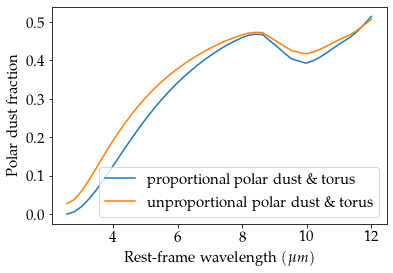

In [33]:
plt.plot(np.linspace(1, 12)[7:], frac0[7:], label="proportional polar dust \& torus")
plt.plot(np.linspace(1, 12)[7:], frac00[7:], label="unproportional polar dust \& torus")
plt.legend()
plt.xlabel("Rest-frame wavelength $(\mu m)$")
plt.ylabel("Polar dust fraction")


plt.savefig('/Users/wul/Desktop/polar6.pdf', bbox_inches="tight")

In [34]:
while True:
    data = gen_data(0.5, 0.1085)

    res = opt.minimize(
        lambda s: target(data, *s), 
        [_a_std, _b_std],
        bounds=opt.Bounds(
            [0, 0],
            [np.inf, np.inf]
        )
    )

    s_a, s_b = res.x
    a, b, angle = data
    c = np.corrcoef(s_a * a + np.log10(angle), s_b * b + np.log10(1-angle))[0, 1]

    if np.abs(c - corr_min) < 1e-4:
        break

In [35]:
s_a**2 / _a_std**2, s_b**2 / _b_std**2

(0.8434534811893442, 0.705458050997578)

In [25]:
@np.vectorize
def frac2corrfrac(polar_frac):
    a_ = s_a * a + np.log10(angle)
    b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1 - angle)
    b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
    b_ = np.log10(10 ** b_torus + 10 ** b_polar)
    frac = 10**np.mean(b_polar - b_)
    return [np.corrcoef(a_, b_)[0, 1], frac]

In [26]:
from scipy.interpolate import CubicSpline

f = np.linspace(0,1)
res = np.array([frac2corrfrac(f) for f in f])
frac = res[:,1]
corr = res[:,0]
frac2corr0 = CubicSpline(frac, corr)

<ipython-input-25-c9c992df9568>:5: RuntimeWarning: divide by zero encountered in log10
  b_polar = s_b * b + np.log10(polar_frac) + np.log10(angle)
<ipython-input-25-c9c992df9568>:4: RuntimeWarning: divide by zero encountered in log10
  b_torus = s_b * b + np.log10(1 - polar_frac) + np.log10(1 - angle)


In [27]:
corr2frac0 = CubicSpline(corr, frac)
frac0 = corr2frac0(oiii_corrs)
frac0_up = corr2frac0(oiii_corrs + cors_std)
frac0_low = corr2frac0(oiii_corrs - cors_std)

In [9]:
np.savetxt("frac_uncorrelated", [frac0, frac0_up, frac0_low])

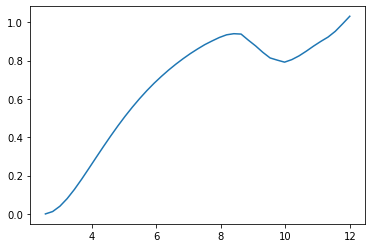

In [8]:
plt.plot(np.linspace(1, 12)[7:], frac0[7:], label="original")

In [11]:
frac1 = np.loadtxt("frac0")

In [14]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 15
})

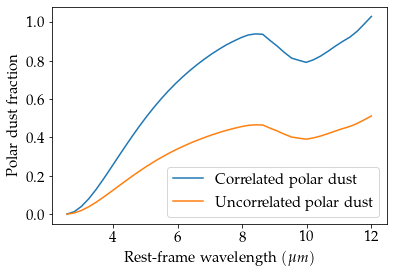

In [17]:
plt.plot(np.linspace(1, 12)[7:], frac0[7:], label="Correlated polar dust")
plt.plot(np.linspace(1, 12)[7:], frac1[7:], label="Uncorrelated polar dust")
plt.legend()
plt.xlabel("Rest-frame wavelength $(\mu m)$")
plt.ylabel("Polar dust fraction")


plt.savefig('/Users/wul/Desktop/polar5.pdf', bbox_inches="tight")